# Calculating a Double Integral Using Different Methods

## Simpson' s 1/3 rule

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x,y): #The function whose integral is going to be calculated
    return x**2+y**3 

In [3]:
def simpsons13(y,hy,hx): #Simpson' s 1/3 rule
    return (hy*hx/3)*(y[0]+4*y[1]+y[2])

In [4]:
def doubleintegral(nx):
    dx=1/nx #in order to change the steps from x=0 to x=1. The number of steps (nx) should be even
    result=0
    for i in range(nx+1):
        x=i*dx
        dy=0.5*x #Steps for y are from x to 1.5x to 2x
        y=[f(x,x),f(x,x+dy),f(x,x+2*dy)]
        result=result+simpsons13(y,dy,dx)
    return result

In [5]:
#The implementation was made for nx=2,50,100,1000
nx2=2
result2=doubleintegral(nx2)
print("According to Simpson 1/3 rule with dx=0.5 and dy=0.5x the result is", result2)

According to Simpson 1/3 rule with dx=0.5 and dy=0.5x the result is 2.5546875


In [6]:
nx20=20
result20=doubleintegral(nx20)
print("According to Simpson 1/3 rule with dx=0.05 and dy=0.5x the result is", result20)

According to Simpson 1/3 rule with dx=0.05 and dy=0.5x the result is 1.1224992187500002


In [7]:
nx100=100
result100=doubleintegral(nx100)
print("According to Simpson 1/3 rule with dx=0.01 and dy=0.5x the result is", result100)

According to Simpson 1/3 rule with dx=0.01 and dy=0.5x the result is 1.0238999987500002


In [8]:
nx1000=1000
result1000=doubleintegral(nx1000)
print("According to Simpson 1/3 rule with dx=0.002 and dy=0.5x the result is", result1000)

According to Simpson 1/3 rule with dx=0.002 and dy=0.5x the result is 1.0023764999998752


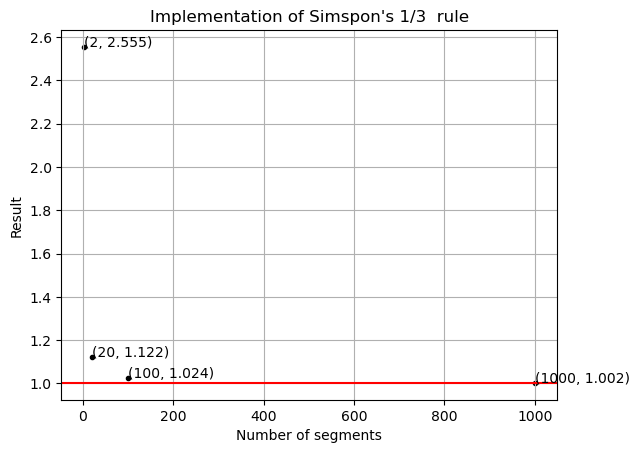

In [9]:
#scatter of the integral's result as a function of the number of segments
xarray=np.array((nx2,nx20,nx100,nx1000))
yarray=np.round(np.array((result2,result20,result100,result1000)),3)
plt.scatter(xarray, yarray, color='k',marker='.')
plt.axhline(y=1, color='r', linestyle='-')
plt.grid()
plt.xlabel("Number of segments")
plt.ylabel("Result")
plt.title("Implementation of Simspon's 1/3  rule")

for (xi, yi) in zip(xarray, yarray):
    plt.text(xi, yi,   (xi,yi))
plt.show()


Simson' s 1/3 rule only for the dx integration

In [10]:
import sympy as sp

In [11]:
def innerintegral(x):#caclculation of the symbolic integral of f
    y=sp.Symbol('y')
    integrand=f(x, y)
    result=sp.integrate(integrand, (y,x,2*x))
    return result

In [12]:
def simpsons1(f, a, b, n):
    h=(b - a) / n
    x_vals=np.linspace(a, b, n+1)
    y_vals=np.array([f(xi) for xi in x_vals])
    return h/3*(y_vals[0]+4*np.sum(y_vals[1:-1:2])+2*np.sum(y_vals[2:-2:2])+y_vals[-1]) #second term is for even terms of the general equation and third term for the odd ones

In [13]:
#Outer integration
x0=0
x1=1
x=sp.Symbol('x')
symbolicresult=innerintegral(x)
finalresult=simpsons1(lambda xi:symbolicresult.subs(x,xi),x0,x1,2)
print(finalresult)

1.03125000000000


## Monte Carlo Integration

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


First of all, a 3D plot was drawn for help

In [15]:
N=1000
xp=np.linspace(0,1,N)
yp=np.linspace(0,2,N)
X, Y=np.meshgrid(xp,yp) #In order to find all the possible combinations of xp and yp
limits=(Y>=X)&(Y<=2*X) #y is from x to 2x
Z=np.zeros_like(X) #To create an array of zeros of X's size
Z[limits]=f(X[limits],Y[limits]) #Z is equal to function f inside the limits of the asked integration


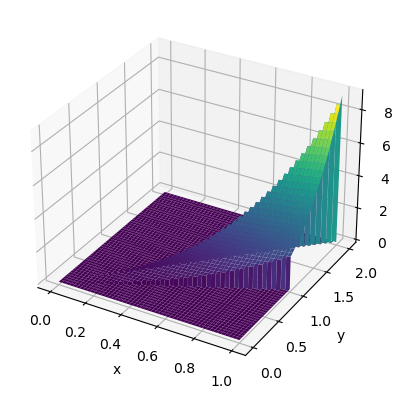

In [16]:
figurez=plt.figure()
ax=figurez.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,Z,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

plt.show()

In [17]:
Volume=1*2*f(1,2) #The qubic volume defined from zmax, xmax and ymax
resultsarray=np.zeros((4,2))
N=np.array([100,1000,10000,100000])
for j in range(len(N)):
    sum=0 #Number of points inside the volume that the integral represents
    for i in range(N[j]):
        Xrand=np.random.random()
        Yrand=2*np.random.random()
        Zrand=9*np.random.random()
        if ((Zrand<=Xrand**2+Yrand**3) & (Yrand>=Xrand) & (Yrand<=2*Xrand)):
            sum=sum+1
    integralresult=sum/N[j]*Volume #The percentage of the hole volume inside the integral is sum/N
    print("Using Monte Carlo method, integral is calculated equal to",integralresult)
    resultsarray[j,0]=N[j]
    resultsarray[j,1]=integralresult
#print((pd.DataFrame(np.round(resultsarray,2))).style.to_latex())

Using Monte Carlo method, integral is calculated equal to 0.18
Using Monte Carlo method, integral is calculated equal to 1.0979999999999999
Using Monte Carlo method, integral is calculated equal to 1.0296
Using Monte Carlo method, integral is calculated equal to 1.0141200000000001
